# Capstone Project - The Collisions in Seattle (Week2)
### Applied Data Science Capstione by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology and Analysis](#methodologyandanalysis)
* [Results and Discussion](#resultsanddiscussion)
* [Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

 The traffic congestion in Seattle area is among the worst in the United States, according to [the 2019 Urban Mobility Report](https://www.google.com), which is a new study result conducted by Texas A&M University's Transportation Institute. This study estimated 3.1 billion dollars as the annual cost of the congestion, and 1,408 dollars as the annual cost of congestion per commuter. Therefore, understanding the traffic problem, representatively the collosion which is one of the major cause of the congestion is highly demanded to enhance the traffic status in Seattle. In this project, we aim to analyze and predict the severity of the car accidents occurred in Seattle, to provide the refined information to the stake holders.
 
 **Stake holders**
 - Public Transportation Authority in Seattle
 - Drivers in Seattle
 - Insurance Designer for car accidents

## 2. Data <a name="data"></a>

The dataset exploited in this project is titled ***Collisions - All years***, which is provided by SPD and recorcorded by Traffic Records. This dataset was generated based on the car accidents that have taken place in Seattle from 2004 to 2020. The data is prepared in .csv file, the rows of which represent individual case of accident, labeled with severity in a scale of 0 to 3. For example, 0 indicates unknown, 1 is prop damage, 2 demonstrates injury with 2b for serious injury, and 3 represents fatality. In this project, we aim to construct a model to predict the severity of each case of car accident, based on the attributes such as road condition, light condition, speeding, etc.

Let's take a look at our data first.

In [54]:
import pandas as pd
import numpy as np

In [55]:
df_all=pd.read_csv("./data/Data-Collisions.csv")

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [56]:
df_all.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [57]:
print(df_all.isnull().sum())

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64


As shown above, each row represents the individual case of car accident, and the column indicates the attributes that the collision has. Now we need to check the size of dataset and what kind of attribute we have in this dataset.

In [58]:
print("The size of datset: ", df_all.shape)

The size of datset:  (194673, 38)


In [59]:
df_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [60]:
df_all.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


Since the dataset is labeled with severity code which is the target we predict, we need to know the distribution of the label - what kind of label is used and how many of them are there.

In [61]:
df_all['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Contrary to my expectation, the dataset is labeled with only 1 (prop damage) and 2(injury), without label 0 (Unknown) or 3(fatality). Which means, the labeling is rather a binary work.

### Data Cleaning

To clean the data, let's remove unrelated attributes such as geometric address, date, time, duplicated columns (e.g. SEVERITYCODE.1), and the attributes where only one value are available (e.g. INATTENTIONIND), to redefine the dataset with related attributes in the collosion.

In [62]:
df=df_all[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','ROADCOND','LIGHTCOND','WEATHER']]
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,ROADCOND,LIGHTCOND,WEATHER
0,2,Intersection,Angles,2,2,At Intersection (intersection related),Wet,Daylight,Overcast
1,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Wet,Dark - Street Lights On,Raining
2,1,Block,Parked Car,4,3,Mid-Block (not related to intersection),Dry,Daylight,Overcast
3,1,Block,Other,3,3,Mid-Block (not related to intersection),Dry,Daylight,Clear
4,2,Intersection,Angles,2,2,At Intersection (intersection related),Wet,Daylight,Raining


In [63]:
df.describe(include='all')

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,ROADCOND,LIGHTCOND,WEATHER
count,194673.000000,192747,189769,194673.000000,194673.000000,188344,189661,189503,189592
unique,NaN,3,10,NaN,NaN,7,9,9,11
top,NaN,Block,Parked Car,NaN,NaN,Mid-Block (not related to intersection),Dry,Daylight,Clear
freq,NaN,126926,47987,NaN,NaN,89800,124510,116137,111135
mean,1.298901,NaN,NaN,2.444427,1.920780,NaN,NaN,NaN,NaN
std,0.457778,NaN,NaN,1.345929,0.631047,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN


In [64]:
print("Data shape before removing NaN: ",df.shape)
df.dropna(how='any',inplace=True)
print("Data shape after removing NaN: ",df.shape)

Data shape before removing NaN:  (194673, 9)
Data shape after removing NaN:  (182895, 9)


<ipython-input-64-32c0de986ac0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='any',inplace=True)


Additionally, we need to remove "Unknown" and "Other" properties of each case, which appears in COLLISIONTYPE, JUNCTIONTYPE,ROADCOND, LIGHTCOND, and WEATHER attributes.

In [65]:
drop_i1 = df[((df.COLLISIONTYPE == 'Other') | (df.JUNCTIONTYPE == 'Unknown'))].index
df.drop(drop_i1, inplace=True)
print("Other and Unknown property removed in COLLISIONTYPE and JUNCTIONTYPE", df.shape)
drop_i2 = df[((df.ROADCOND == 'Unknown') | (df.ROADCOND == 'Other'))].index
df.drop(drop_i2, inplace=True)
print("Other and Unknown property removed in ROADCOND", df.shape)
drop_i3 = df[((df.LIGHTCOND == 'Unknown') | (df.LIGHTCOND == 'Other'))].index
df.drop(drop_i3, inplace=True)
print("Other and Unknown property removed in LIGHTCOND", df.shape)
drop_i4 = df[((df.WEATHER == 'Unknown') | (df.WEATHER == 'Other'))].index
df.drop(drop_i4, inplace=True)
print("Other and Unknown property removed in WEATHER", df.shape)

Other and Unknown property removed in COLLISIONTYPE and JUNCTIONTYPE (159932, 9)
Other and Unknown property removed in ROADCOND (148895, 9)
Other and Unknown property removed in LIGHTCOND (146307, 9)
Other and Unknown property removed in WEATHER (145369, 9)


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,ROADCOND,LIGHTCOND,WEATHER
0,2,Intersection,Angles,2,2,At Intersection (intersection related),Wet,Daylight,Overcast
1,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Wet,Dark - Street Lights On,Raining
2,1,Block,Parked Car,4,3,Mid-Block (not related to intersection),Dry,Daylight,Overcast
4,2,Intersection,Angles,2,2,At Intersection (intersection related),Wet,Daylight,Raining
5,1,Intersection,Angles,2,2,At Intersection (intersection related),Dry,Daylight,Clear


To understand the attributes of the dataset in detail, let's count the values in each column.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Counts')

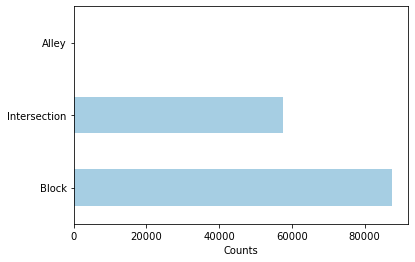

In [68]:
# df['ADDRTYPE'].value_counts().plot(kind='pie', explode=[0.02, 0.02, 0.02],figsize=(5,5), autopct='%.2f%%')
ax1=df['ADDRTYPE'].value_counts().plot(kind='barh',colormap='Paired')
ax1.set_xlabel("Counts")


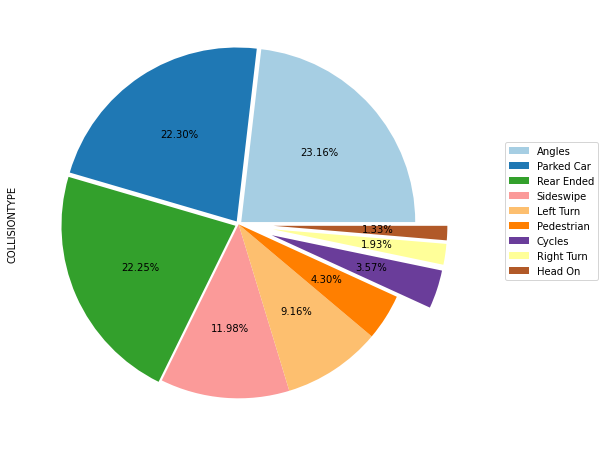

In [69]:
ax2=df['COLLISIONTYPE'].value_counts().plot(kind='pie',explode=[0.02, 0.02, 0.02,0.0,0.0,0.0,0.2,0.2,0.2], \
                                        figsize=(8,8), autopct='%.2f%%',fontsize=10, colormap='Paired',\
                                        labeldistance=None, legend=True)
ax2.legend(bbox_to_anchor=(1.1,0.7))

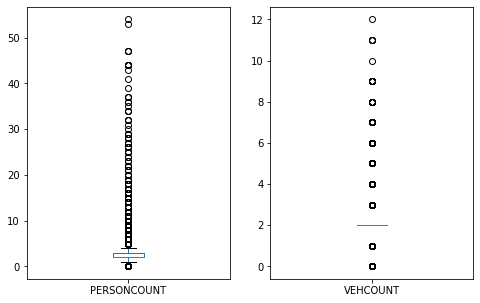

In [70]:
fig, axes=plt.subplots(1,2)
df['PERSONCOUNT'].plot(kind='box',ax=axes[0],figsize=(4,4))
df['VEHCOUNT'].plot(kind='box',ax=axes[1],figsize=(4,4))
fig.set_figheight(5)
fig.set_figwidth(8)

In [71]:
df[['PERSONCOUNT', 'VEHCOUNT']].corr()

,PERSONCOUNT,VEHCOUNT
PERSONCOUNT,1.00000,0.33224
VEHCOUNT,0.33224,1.00000


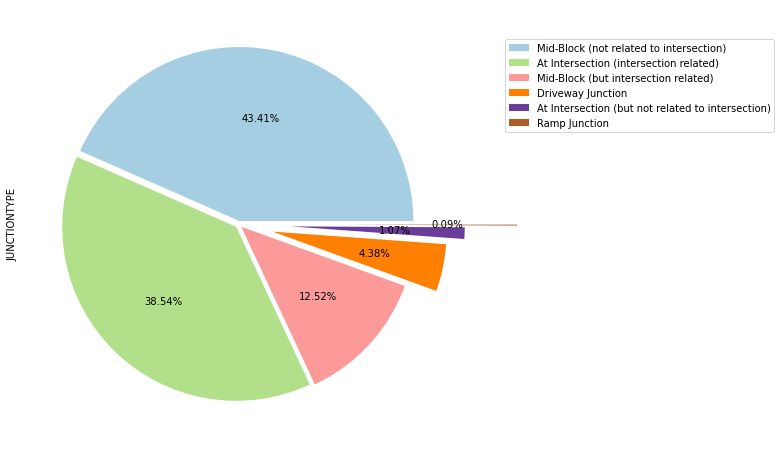

In [72]:
ax5=df['JUNCTIONTYPE'].value_counts().plot(kind='pie', explode=[0.02, 0.02, 0.02,0.2,0.3,0.6], \
                                            figsize=(8,8), autopct='%.2f%%',colormap='Paired', \
                                            labeldistance=None, legend=True)
ax5.legend(bbox_to_anchor=(1.1,0.7))

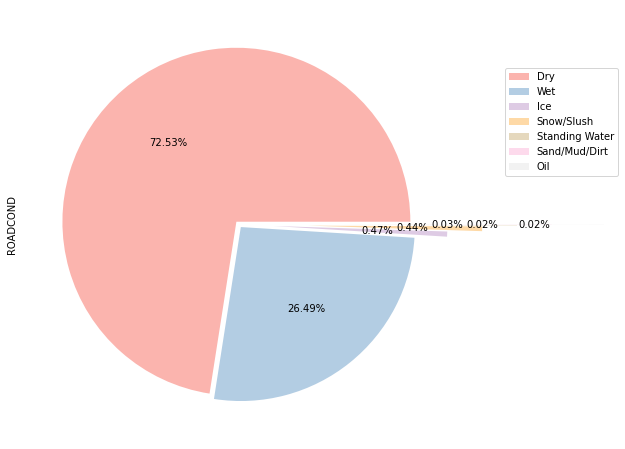

In [73]:
ax6=df['ROADCOND'].value_counts().plot(kind='pie', explode=[0.02,0.02,0.2,0.4,0.6,0.8,1.1], \
                                       figsize=(8,8), autopct='%.2f%%',colormap='Pastel1', \
                                       labeldistance=None, legend=True)
ax6.legend(bbox_to_anchor=(1.1,0.6))

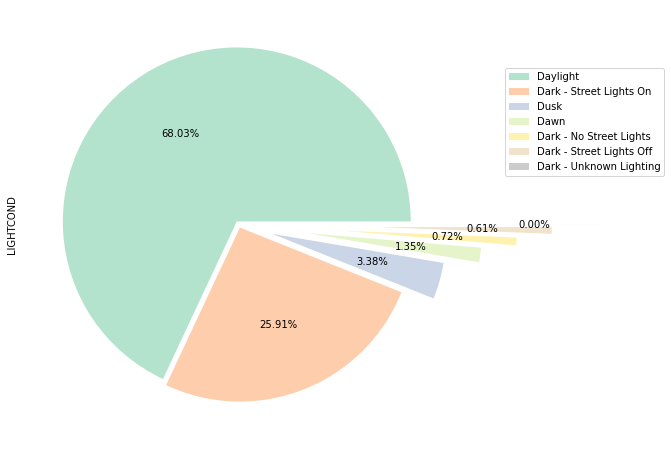

In [74]:
ax7=df['LIGHTCOND'].value_counts().plot(kind='pie', explode=[0.02,0.02,0.2,0.4,0.6,0.8,1.1], \
                                       figsize=(8,8), autopct='%.2f%%',colormap='Pastel2', \
                                       labeldistance=None, legend=True)
ax7.legend(bbox_to_anchor=(1.1,0.6))

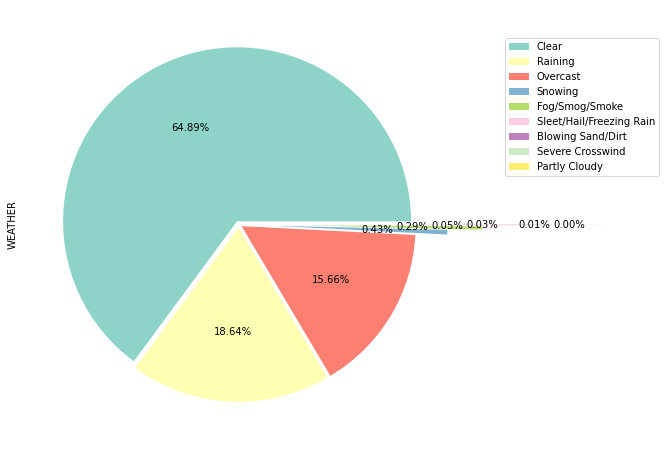

In [75]:
ax8=df['WEATHER'].value_counts().plot(kind='pie',
                                       explode=[0.02,0.02,0.02,0.2,0.4,0.6,0.8,1.1,1.3], \
                                       figsize=(8,8), autopct='%.2f%%',colormap='Set3', \
                                       labeldistance=None, legend=True)
ax8.legend(bbox_to_anchor=(1.1,0.6))

## Methodology and Analysis <a name="methodologyandanalysis"></a>

#### Decision Tree
Because some of attributes cannot be handled as numbers (e.g. WEATHER) but are rahter categorical values, let's try build our model with decision tree.

In [76]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [77]:
X = df[['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','ROADCOND','LIGHTCOND','WEATHER']].values
X[0:5]

array([['Intersection', 'Angles', 2, 2,
        'At Intersection (intersection related)', 'Wet', 'Daylight',
        'Overcast'],
       ['Block', 'Sideswipe', 2, 2,
        'Mid-Block (not related to intersection)', 'Wet',
        'Dark - Street Lights On', 'Raining'],
       ['Block', 'Parked Car', 4, 3,
        'Mid-Block (not related to intersection)', 'Dry', 'Daylight',
        'Overcast'],
       ['Intersection', 'Angles', 2, 2,
        'At Intersection (intersection related)', 'Wet', 'Daylight',
        'Raining'],
       ['Intersection', 'Angles', 2, 2,
        'At Intersection (intersection related)', 'Dry', 'Daylight',
        'Clear']], dtype=object)

In [78]:
y = df['SEVERITYCODE']
y [0:5]

0    2
1    1
2    1
4    2
5    1
Name: SEVERITYCODE, dtype: int64

In [79]:
le_addr = preprocessing.LabelEncoder()
le_addr.fit(['Alley','Intersection','Block'])
X[:,0] = le_addr.transform(X[:,0]) 

In [80]:
le_col = preprocessing.LabelEncoder()
le_col.fit(['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'])
X[:,1] = le_col.transform(X[:,1]) 

In [81]:
le_jun = preprocessing.LabelEncoder()
le_jun.fit(['Mid-Block (not related to intersection)','At Intersection (intersection related)','Mid-Block (but intersection related)','Driveway Junction','At Intersection (but not related to intersection)','Ramp Junction','Unknown'])
X[:,4] = le_jun.transform(X[:,4]) 

In [82]:
le_road = preprocessing.LabelEncoder()
le_road.fit(['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,5] = le_road.transform(X[:,5]) 

In [83]:
le_lig = preprocessing.LabelEncoder()
le_lig.fit(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'])
X[:,6] = le_lig.transform(X[:,6])

In [84]:
le_wea = preprocessing.LabelEncoder()
le_wea.fit(['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
X[:,7] = le_wea.transform(X[:,7])

In [85]:
X[0:5]

array([[2, 0, 2, 2, 1, 8, 5, 4],
       [1, 9, 2, 2, 4, 8, 2, 6],
       [1, 5, 4, 3, 4, 0, 5, 4],
       [2, 0, 2, 2, 1, 8, 5, 6],
       [2, 0, 2, 2, 1, 0, 5, 1]], dtype=object)

In [86]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [87]:
collTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
collTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [88]:
collTree.fit(X_trainset,y_trainset)
predTree = collTree.predict(X_testset)

In [93]:
print("DecisionTrees's training set accuracy: ", metrics.accuracy_score(y_trainset, collTree.predict(X_trainset)))

DecisionTrees's training set accuracy:  0.7251026946284321


In [94]:
print("DecisionTrees's test set accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's test set accuracy:  0.7236706335557542


In [2]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /Users/schona/opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |   py37h2987424_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                4.8.5-py37h2987424_2 --> 4.9.0-py37h2987424_0



conda-4.9.0          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.



In [91]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 11.8 MB 4.2 MB/s eta 0:00:01
anceled
ERROR: Operation cancelled by user


In [1]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

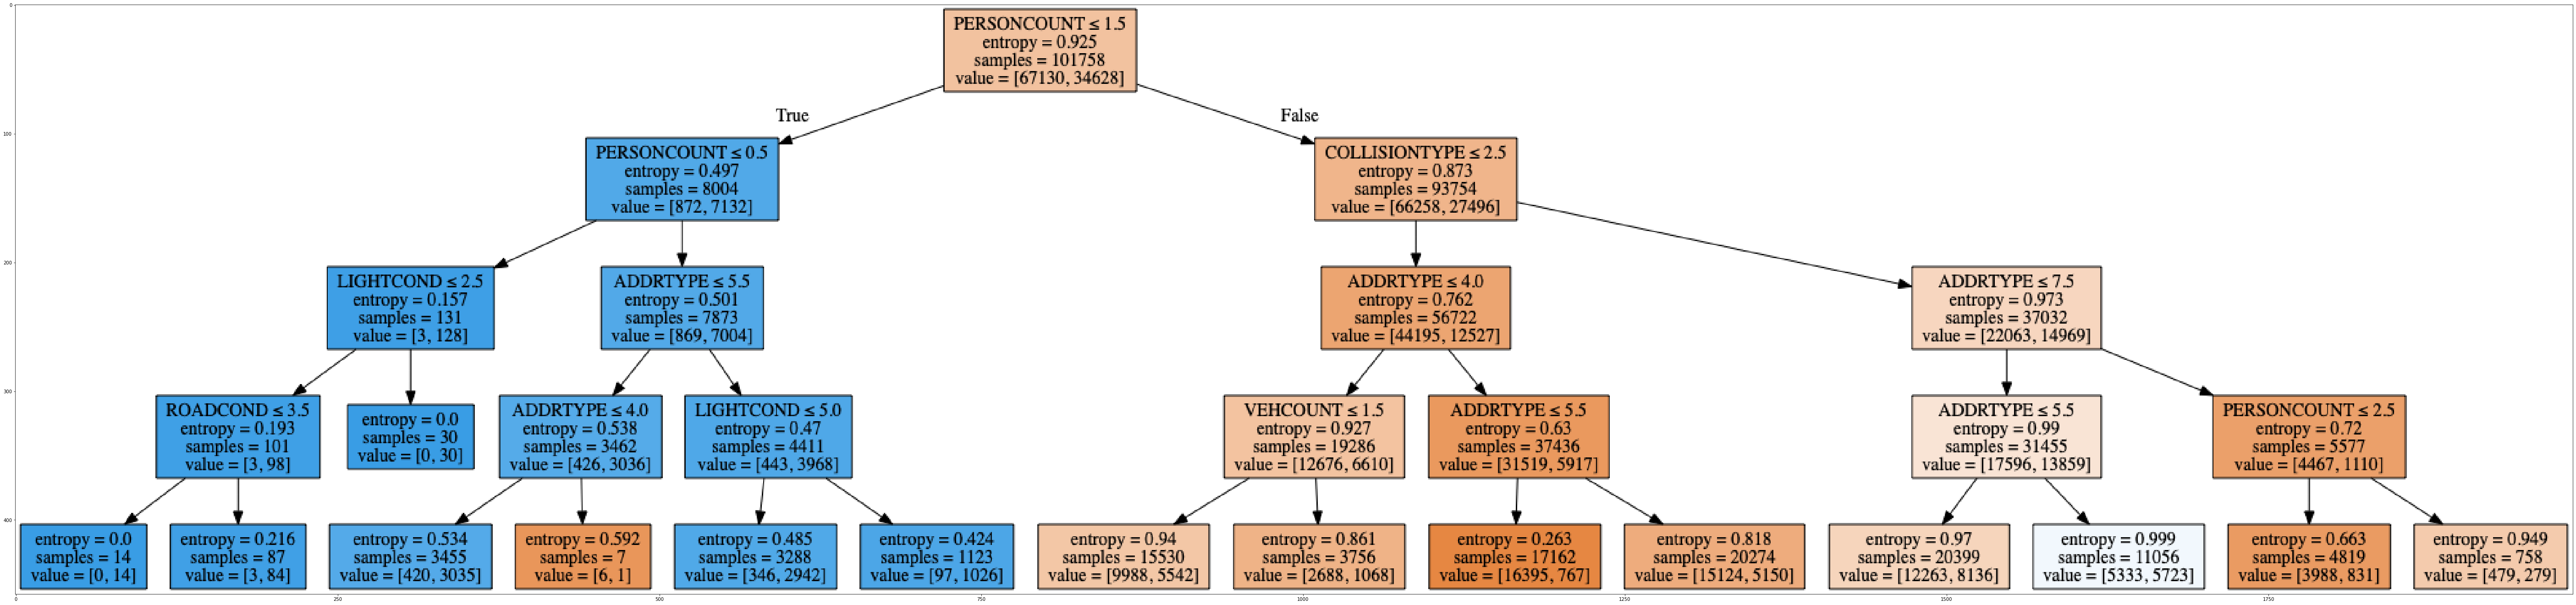

In [42]:
dot_data = StringIO()
filename = "collision_tree.png"
featureNames = df.columns[0:8]
targetNames = df["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(collTree,feature_names=featureNames, out_file=dot_data, class_names=None, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.savefig(filename)

In [30]:
from sklearn.metrics import f1_score
print("f1_score of Desicion Tree model: ", f1_score(y_testset, predTree))

f1_score of Desicion Tree model:  0.8122400012464359


In [ ]:
print("DecisionTrees's training set accuracy: ", metrics.accuracy_score(y_trainset, collTree.predict(X_trainset)))
print("DecisionTrees's test set accuracy: ", metrics.accuracy_score(y_testset, predTree))

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, solver='liblinear')

#### Logistic Regression

In [32]:
yhat_LR = LR.predict(X_testset)
yhat_LR

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print (classification_report(y_testset, yhat_LR))

              precision    recall  f1-score   support

           1       0.70      0.94      0.80     28791
           2       0.67      0.22      0.33     14820

    accuracy                           0.70     43611
   macro avg       0.68      0.58      0.57     43611
weighted avg       0.69      0.70      0.64     43611



#### K-nearest neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(n_neighbors=4)

In [39]:
yhat_k = neigh.predict(X_testset)
yhat_k[0:5]

array([1, 1, 1, 1, 1])

In [40]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat_k))

Train set Accuracy:  0.7123371135438983
Test set Accuracy:  0.6985852193253995


In [50]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

In [51]:
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat_kk=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat_kk)
    
    std_acc[n-1]=np.std(yhat_kk==y_testset)/np.sqrt(yhat_kk.shape[0])

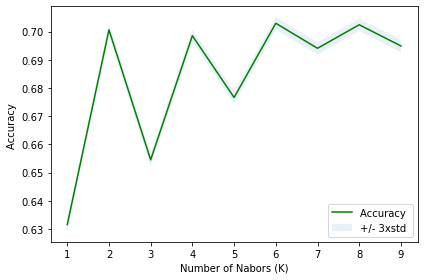

In [52]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [41]:
k_final=6
neigh_final = KNeighborsClassifier(n_neighbors = k_final).fit(X_trainset,y_trainset)
yhat_final = neigh_final.predict(X_testset)
print("Train set Accuracy with k = 6: ", metrics.accuracy_score(y_trainset, neigh_final.predict(X_trainset)))
print("Test set Accuracy with k = 6: ", metrics.accuracy_score(y_testset, yhat_final))
print("f1_score of K-nearest neighbors: ", f1_score(y_testset, yhat_final))

Train set Accuracy with k = 6:  0.7155014839128128
Test set Accuracy with k = 6:  0.702987778312811
f1_score of K-nearest neighbors:  0.7901702548152467


#### Support Vector Machine

In [34]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset)
yhat_svm = clf.predict(X_testset)
yhat_svm[0:5]

array([1, 1, 1, 1, 1])

In [44]:
print("Train set Accuracy of SVM : ", metrics.accuracy_score(y_trainset, clf.predict(X_trainset)))

Train set Accuracy of SVM :  0.7263114448004088


In [45]:
print("Test set Accuracy of SVM: ", metrics.accuracy_score(y_testset, yhat_svm))

Test set Accuracy of SVM:  0.7251381532182247


In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.71      0.97      0.82     28791
           2       0.82      0.25      0.38     14820

    accuracy                           0.73     43611
   macro avg       0.77      0.61      0.60     43611
weighted avg       0.75      0.73      0.67     43611

Confusion matrix, without normalization
[[27967   824]
 [11163  3657]]


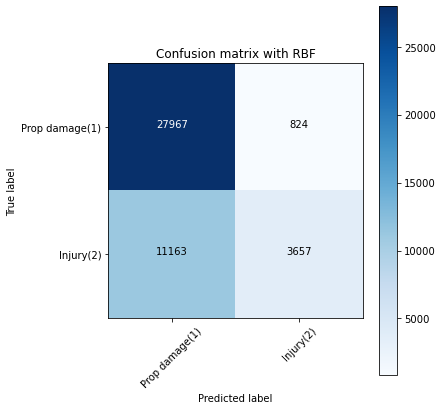

In [52]:
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_testset, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['Prop damage(1)','Injury(2)'],normalize= False,  title='Confusion matrix with RBF')


## Result and Discussion <a name="resultsanddiscussion"></a>

In [105]:
# accuracy ordered in 'Desicion Tree', '6-nearest neighbors', 'SVM with RBF'
training_acc=[0.72, 0.71, 0.72]
test_acc=[0.72, 0.70, 0.72]
f1_score = [0.81, 0.79, 0.82]
index = ['Desicion Tree', '6-nearest neighbors', 'SVM with RBF']

In [108]:
df_result = pd.DataFrame({'training accuracy': training_acc,'test accuracy': test_acc,'f1 score': f1_score}, index=index)

In [110]:
df_result

,training accuracy,test accuracy,f1 score
Desicion Tree,0.72,0.72,0.81
6-nearest neighbors,0.71,0.70,0.79
SVM with RBF,0.72,0.72,0.82


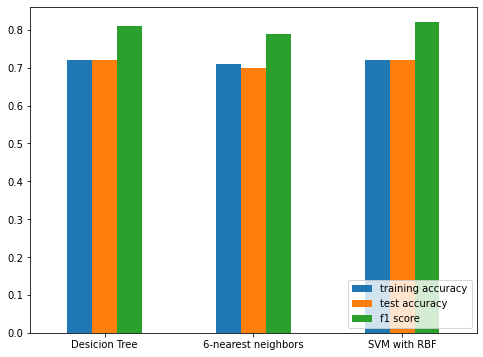

In [125]:
ax_result=df_result.plot.bar(rot=0, figsize=(8,6))
ax_result.legend(loc = 'lower right')

## Conclusion <a name="conclusion"></a>

In this project, the severity of car accidents was predicted based on machine learning algorithm using three different training methods: K-nearest neighbors, decision tree, and support vector machine. The dataset was provided by Seattle car collision data, which are labeled by either property damage (1) or injury (2). After training, support vector machine with radial basis function produced the best F1 score, 0.82, among the applied training methods. Therefore, it can be concluded that support vector machine is the proper method in severity prediction. 